In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # resize graphs
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.model_selection import train_test_split

DATA_DIR = '../../local_data/features/'

In [2]:
%%time

X = np.load(os.path.join(DATA_DIR, 'features.npy'))
y = np.load(os.path.join(DATA_DIR, 'labels.npy'))[0]

_, X_test, _, y_test = train_test_split(X, y, test_size=0.005)

tsne = manifold.TSNE(n_components=2, perplexity=10, init='pca')
Y = tsne.fit_transform(X_test)

CPU times: user 14min 8s, sys: 18.7 s, total: 14min 27s
Wall time: 14min 25s


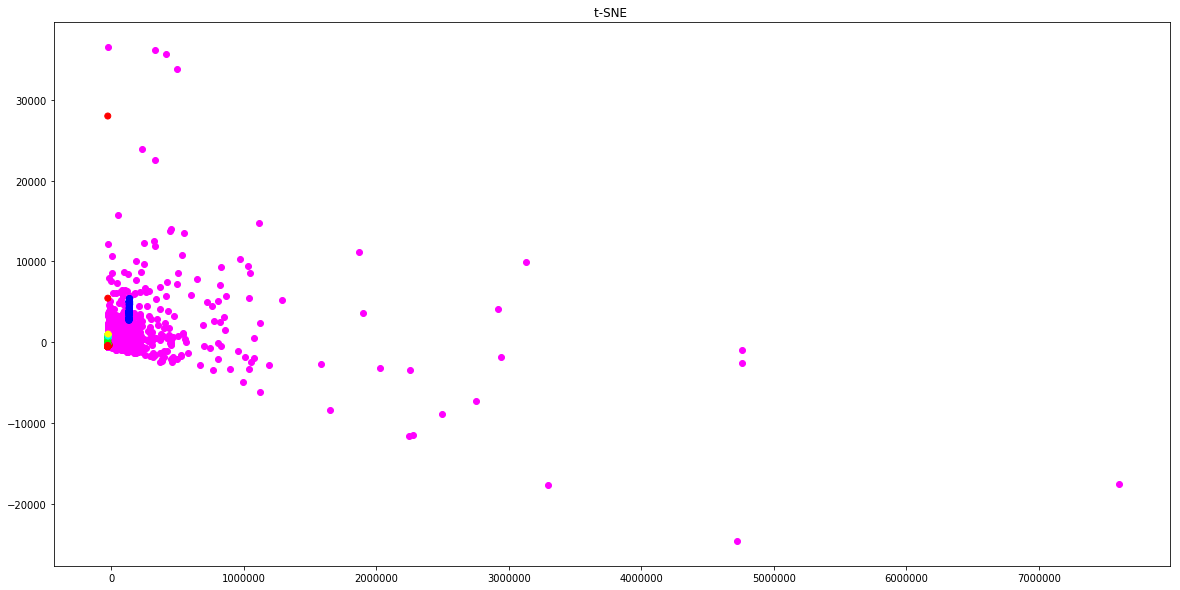

In [3]:
colors = {'internal': "#FF0000", 
          'ddos': "#00FF00",
          'irc_botnet_ddos': "#0000FF",
          'brute_force': "#FFFF00",
          'ssh_brute_force': "#00FFFF"
         }

# separate out attacks and normals so we can plot the normals at the bottom
# otherwise they cover a lot of the attacks
normal_x = []
normal_y = []
attack_x = []
attack_y = []
attack_tag = []

for idx, tag in enumerate(y_test):
    if tag == "Normal":
        normal_x.append(Y[idx,0])
        normal_y.append(Y[idx,1])
    else:
        attack_x.append(Y[idx,0])
        attack_y.append(Y[idx,1])
        attack_tag.append(tag)

plt.scatter(normal_x, normal_y, c="#FF00FF")
plt.scatter(attack_x, attack_y, c=[colors[tag] for tag in attack_tag])
plt.title("t-SNE ")

plt.show()